In [ ]:
# !nvidia-smi

In [2]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DATA_DIR = 'Pan_Pata/Train_S'
CATEGORIES = ['Bacterial_leaf_spot','Steam_leaf'] 
IMG_SIZE = 224

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATA_DIR,category) 
        class_num = CATEGORIES.index(category) 
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass

create_training_data()

print(len(training_data))

100%|██████████| 2520/2520 [02:09<00:00, 19.43it/s] 

5134


In [5]:
import random
random.shuffle(training_data)

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)

y = np.array(y)

In [7]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [8]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [11]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape=X.shape[1:], kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_10 (Activation)  (None, 17, 17, 256)      

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test), callbacks = [early_stop])

Epoch 1/15
121/121 [==============================] - 245s 2s/step - loss: 0.4339 - accuracy: 0.8005 - val_loss: 3.1345 - val_accuracy: 0.6550
Epoch 2/15
121/121 [==============================] - 240s 2s/step - loss: 0.3932 - accuracy: 0.8236 - val_loss: 2.1325 - val_accuracy: 0.6822
Epoch 3/15
121/121 [==============================] - 240s 2s/step - loss: 0.3286 - accuracy: 0.8642 - val_loss: 0.8514 - val_accuracy: 0.6854
Epoch 4/15
121/121 [==============================] - 239s 2s/step - loss: 0.2526 - accuracy: 0.9003 - val_loss: 1.6166 - val_accuracy: 0.6012
Epoch 5/15
121/121 [==============================] - 240s 2s/step - loss: 0.3411 - accuracy: 0.8584 - val_loss: 1.2136 - val_accuracy: 0.6768
Epoch 6/15
121/121 [==============================] - 239s 2s/step - loss: 0.2020 - accuracy: 0.9226 - val_loss: 0.4870 - val_accuracy: 0.8349
Epoch 7/15
121/121 [==============================] - 239s 2s/step - loss: 0.1767 - accuracy: 0.9345 - val_loss: 0.9504 - val_accuracy: 0.7593

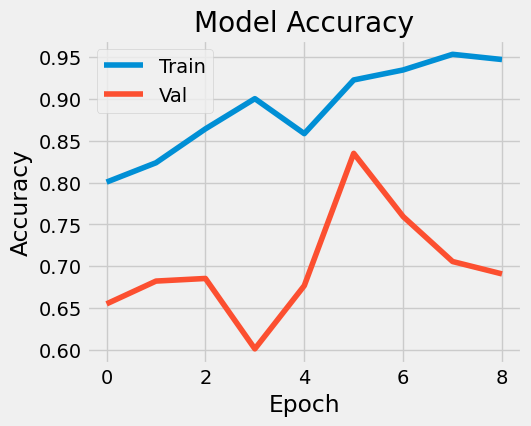

In [24]:
plt.figure(figsize=(5, 4), dpi=100)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

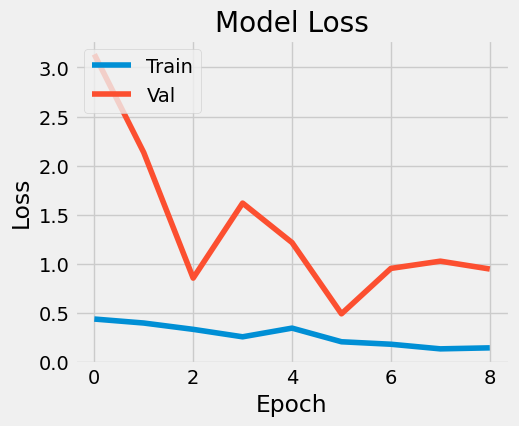

In [23]:
plt.figure(figsize=(5, 4), dpi=100)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
TEST_DIR = 'Pan_Pata/Test'
CATEGORIES = ['Bacterial_leaf_Spot','Steam_leaf'] 
IMG_SIZE = 224

In [26]:
test_data = []

def create_test_data():
    for category in CATEGORIES:  

        path = os.path.join(TEST_DIR,category) 
        class_num = CATEGORIES.index(category) 
        for img in tqdm(os.listdir(path)):  
            try:
                img_array_t = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
                new_array_t = cv2.resize(img_array_t, (IMG_SIZE, IMG_SIZE)) 
                test_data.append([new_array_t, class_num]) 
            except Exception as e:  
                pass

create_test_data()

print(len(test_data))

100%|██████████| 329/329 [00:21<00:00, 15.09it/s]

658


In [32]:
import random

random.shuffle(test_data)

In [33]:
X_t = []
y_t = []

for features,label in test_data:
    X_t.append(features)
    y_t.append(label)

X_t = np.array(X_t).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y_t = np.array(y_t)

In [34]:
pickle_out = open("X_t.pickle","wb")
pickle.dump(X_t, pickle_out)
pickle_out.close()

pickle_out = open("y_t.pickle","wb")
pickle.dump(y_t, pickle_out)
pickle_out.close()

pickle_in = open("X_t.pickle","rb")
X_t = pickle.load(pickle_in)

pickle_in = open("y_t.pickle","rb")
y_t = pickle.load(pickle_in)

pickle_in = open("X_t.pickle","rb")
X_t = pickle.load(pickle_in)

pickle_in = open("y_t.pickle","rb")
y_t = pickle.load(pickle_in)

X_t = X_t/255.0

In [35]:
X_t.shape

(658, 224, 224, 3)

In [36]:
scores = model.evaluate(X_t, y_t, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

21/21 [==============================] - 9s 431ms/step - loss: 1.0389 - accuracy: 0.6337
accuracy: 63.37%


In [51]:
y_pred = model.predict(X_t)

In [59]:
y_pred_pp = np.round(y_pred).astype(int)

In [54]:
y_pred_arg = np.argmax(y_pred, axis=1)

In [38]:
y_pred_cnn = model.predict(X_t).ravel()

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
target_names = ['class 0(Bacterial_leaf_Spot)', 'class 1(Steam_leaf)']
print(classification_report(y_t, y_pred_pp, target_names=target_names))

                              precision    recall  f1-score   support

class 0(Bacterial_leaf_Spot)       0.70      0.47      0.56       329
         class 1(Steam_leaf)       0.60      0.80      0.68       329

                    accuracy                           0.63       658
                   macro avg       0.65      0.63      0.62       658
                weighted avg       0.65      0.63      0.62       658



In [63]:
print(confusion_matrix(y_t, y_pred_pp))

[[155 174]
 [ 67 262]]


# **SVM**

In [88]:
X_train.shape

(3850, 224, 224, 3)

In [91]:
from sklearn.svm import SVC
svm = SVC(C=1000,kernel='poly', gamma=0.001)
svm.fit(X_train,Y_train)

SVC(C=1000, gamma=0.001, kernel='poly')

In [92]:
X_t=X_t.reshape(658,3*224*224)

In [93]:
accuracy = svm.score(X_t,y_t)
print('Accuracy: ', accuracy)

Accuracy:  0.6306990881458967


In [94]:
y_test_svm=y_t

In [95]:
y_pred_svm = svm.predict(X_t)

In [96]:
y_pred_svm_d = svm.decision_function(X_t)

In [97]:
target_names = ['class 0(Bacterial_leaf_Spot)', 'class 1(Steam_leaf)']
print(classification_report(y_test_svm, y_pred_svm, target_names=target_names))

                              precision    recall  f1-score   support

class 0(Bacterial_leaf_Spot)       0.63      0.64      0.63       329
         class 1(Steam_leaf)       0.63      0.62      0.63       329

                    accuracy                           0.63       658
                   macro avg       0.63      0.63      0.63       658
                weighted avg       0.63      0.63      0.63       658



In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_svm, y_pred_svm))

[[211 118]
 [125 204]]


# Logistic **Regression**

In [99]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='saga',  C=100.0)
lg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=100.0, solver='saga')

In [100]:
pred_lg=lg.predict(X_t)

In [101]:
y_pred_lg = lg.decision_function(X_t)

In [102]:
scores = lg.score(X_t,y_t)
print("Accuracy: ", scores)

Accuracy:  0.6109422492401215


In [103]:
from sklearn.metrics import classification_report
target_names = ['class 0(Bacterial_leaf_Spot)', 'class 1(Steam_leaf)']
print(classification_report(y_t, pred_lg, target_names=target_names))

                              precision    recall  f1-score   support

class 0(Bacterial_leaf_Spot)       0.60      0.64      0.62       329
         class 1(Steam_leaf)       0.62      0.58      0.60       329

                    accuracy                           0.61       658
                   macro avg       0.61      0.61      0.61       658
                weighted avg       0.61      0.61      0.61       658



In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_t, pred_lg))

[[211 118]
 [138 191]]


# **KNN**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [107]:
y_pred_knn = knn.predict(X_t)

In [108]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_t, y_pred_knn))

Accuracy: 0.621580547112462


In [109]:
y_scores_knn = knn.predict_proba(X_t)